# El Perceptrón – multi TLUs

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

Se abre el csv


In [5]:
df = pd.read_csv("dataset_sample.csv", sep=";")
df.head()

,X,Z,CU,ZONA,ZONA_TEXT
0,70,0,2.592250,2,PRIMARY SULFIDES
1,58,0,2.814284,2,PRIMARY SULFIDES
2,76,1,2.870914,2,PRIMARY SULFIDES
3,55,4,2.496038,2,PRIMARY SULFIDES
4,38,4,2.647656,2,PRIMARY SULFIDES


se observa su distribucion segun ley y zona


C:\TEMP\ipykernel_12348\1385667957.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(df["X"], df["Z"], marker_size, df["ZONA"], cmap = plt.cm.get_cmap("viridis", 3))


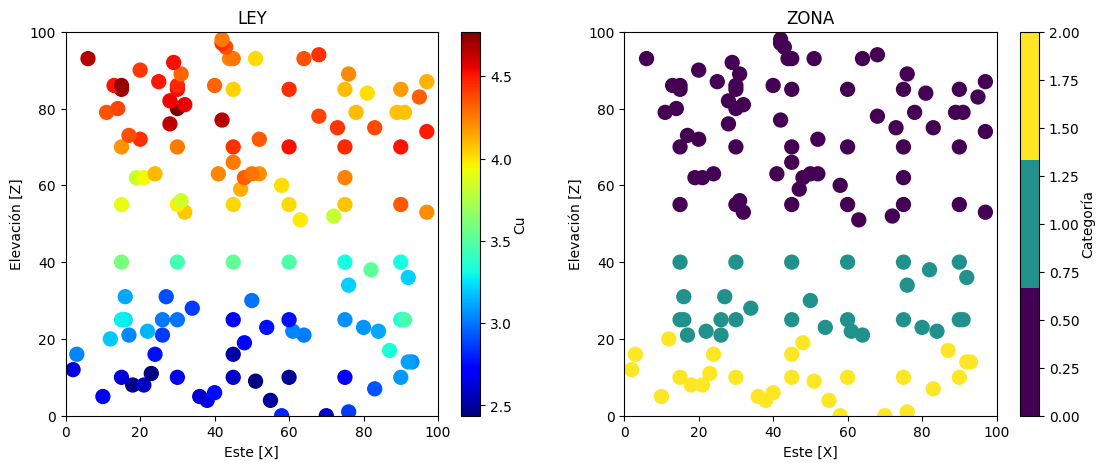

In [6]:
marker_size=100
plt.subplot(121) 
plt.scatter(df["X"], df["Z"], marker_size, df["CU"], cmap = plt.cm.jet)
plt.xlabel('Este [X]')
plt.ylabel('Elevación [Z]')
plt.title('LEY')
plt.xlim(0,100)
plt.ylim(0,100)
cbar=plt.colorbar()
cbar.set_label('Cu', labelpad=+1)
plt.subplot(122) 
plt.scatter(df["X"], df["Z"], marker_size, df["ZONA"], cmap = plt.cm.get_cmap("viridis", 3))
plt.xlabel('Este [X]')
plt.ylabel('Elevación [Z]')
plt.title('ZONA')
plt.xlim(0,100)
plt.ylim(0,100)
cbar=plt.colorbar()
cbar.set_label('Categoría', labelpad=+1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=0.8, wspace=0.2, hspace=0.3)
plt.show()

Se grafica la ley vs z para ver la correlacion


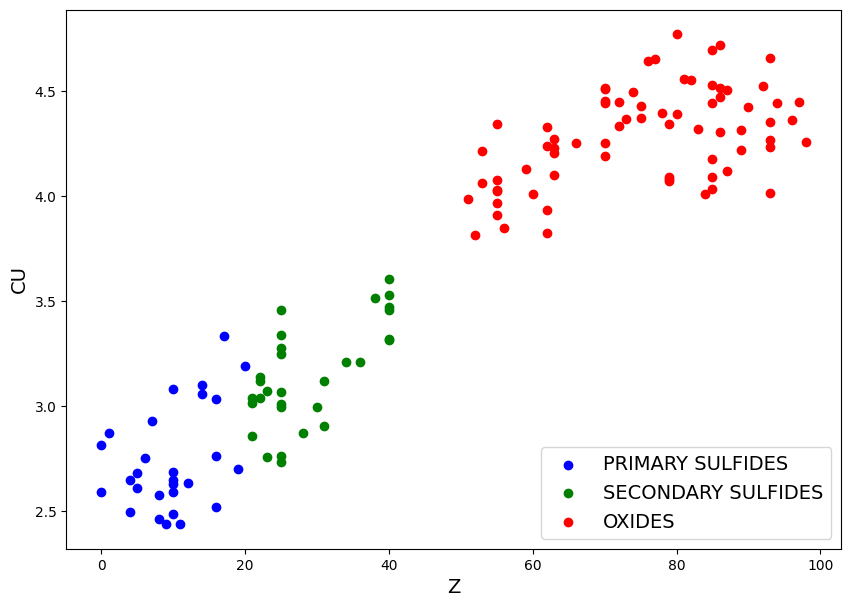

In [7]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(df["Z"][df["ZONA"] == 2], 
            df["CU"][df["ZONA"] == 2], c="b", label="PRIMARY SULFIDES")
plt.scatter(df["Z"][df["ZONA"] == 1], 
            df["CU"][df["ZONA"] == 1], c="g", label="SECONDARY SULFIDES")
plt.scatter(df["Z"][df["ZONA"] == 0], 
            df["CU"][df["ZONA"] == 0], c="r", label="OXIDES")
plt.xlabel("Z", fontsize=14)
plt.ylabel("CU", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.show()

In [8]:
# Reducimos el conjunto de datos para entrenar el algoritmo y visualizar el resultado
df_reduced = df[["Z", "CU", "ZONA"]]
group = df.groupby(["ZONA"]).describe()
group["CU"]

,count,mean,std,min,25%,50%,75%,max
ZONA,,,,,,,,
0,72.0,4.286704,0.228131,3.814163,4.093100,4.311135,4.448244,4.771331
1,30.0,3.148601,0.243497,2.735178,3.000168,3.119289,3.317893,3.603410
2,28.0,2.741543,0.244466,2.437871,2.586913,2.665097,2.885211,3.332864


In [9]:
df_reduced

,Z,CU,ZONA
0,0,2.592250,2
1,0,2.814284,2
2,1,2.870914,2
3,4,2.496038,2
4,4,2.647656,2
...,...,...,...
125,93,4.656801,0
126,94,4.442616,0
127,96,4.364888,0
128,97,4.447451,0


In [10]:
# Separamos las etiquetas de salida del resto de caracteristicas del conjunto de datos
X_df = df_reduced[["Z", "CU"]]
y_df = df_reduced["ZONA"]

Se entrena con 1000 iteraciones

In [11]:
clf = Perceptron(max_iter=1000, random_state=51) #154645
clf.fit(X_df, y_df)

Perceptron(random_state=51)

In [12]:
clf.score(X_df, y_df)

0.8692307692307693

Vemos los parametros encontrados


In [13]:
clf.coef_

array([[  10.        , -112.03601741],
       [ -13.        ,  102.82378422],
       [ -40.        ,  210.08052574]])

Se dibuja las lineas de separacion del moedelo

c:\Users\nicoi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


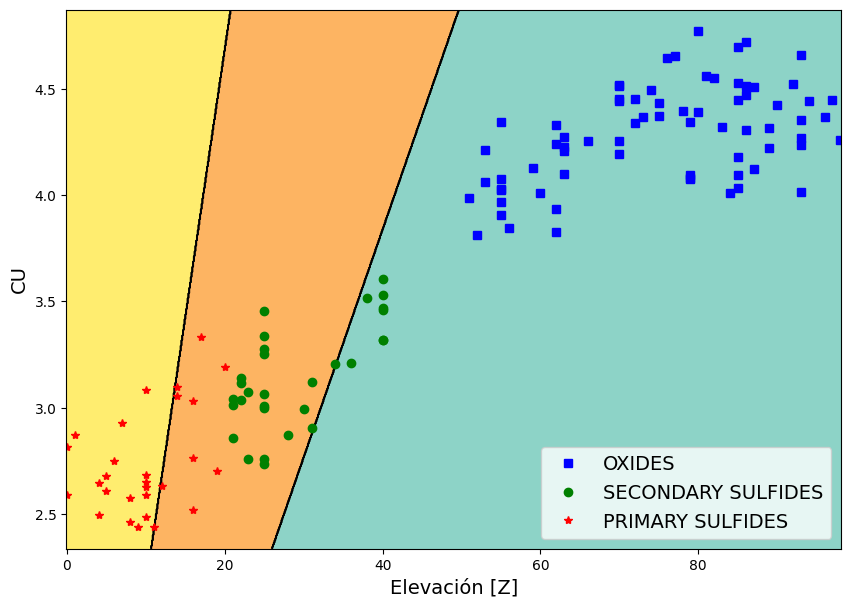

In [14]:
X = X_df.values

mins = X.min(axis=0) - 0.1 #valores mínimos del dataframe (variables LEY y Z)
maxs = X.max(axis=0) + 0.1 #valores máximos del dataframe (variables LEY y Z)

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000), #se crea una malla de 1000x 1000 puntos a partir de las variables
                    np.linspace(mins[1], maxs[1], 1000)) #Z y CU (mín y máx)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) #Se realizá una predicción a lo largo y ancho de toda la malla

fig = plt.figure(figsize=(10, 7))

plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

plt.plot(X[:, 0][y_df ==0], X[:, 1][y_df ==0], 'bs', label="OXIDES")
plt.plot(X[:, 0][y_df ==1], X[:, 1][y_df ==1], 'go', label="SECONDARY SULFIDES")
plt.plot(X[:, 0][y_df ==2], X[:, 1][y_df ==2], 'r*', label="PRIMARY SULFIDES")

plt.xlabel("Elevación [Z]", fontsize=14)
plt.ylabel("CU", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()